# Financial Plot

In [51]:
import logging

import numpy as np
import pandas as pd

from mplchart.samples import sample_prices
from mplchart.indicators import SMA, EMA, SLOPE, RSI
from mplchart.locators import DTArrayLocator
from mplchart.formatters import DTArrayFormatter

import matplotlib.pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats


set_matplotlib_formats('svg')

logging.basicConfig()

logging.getLogger("mplchart").setLevel(logging.DEBUG)


In [52]:
from mplchart.samples import sample_prices

def get_prices(freq="daily"):
    prices = sample_prices(freq=freq)

    prices = prices.assign(
        sma20=SMA(20),
        sma50=SMA(50),
        slope = SLOPE(20),
        rsi14 = RSI(14)
    )

    return prices

prices = get_prices("minute")
prices

,open,high,low,close,volume,sma20,sma50,slope,rsi14
datetime,,,,,,,,,
2025-11-07 09:30:00-05:00,269.795013,270.500000,268.450012,268.674988,1028645,NaN,NaN,NaN,NaN
2025-11-07 09:31:00-05:00,268.709991,269.299988,268.260010,268.309998,146747,NaN,NaN,NaN,NaN
2025-11-07 09:32:00-05:00,268.269989,268.529999,267.350006,267.420013,213643,NaN,NaN,NaN,NaN
2025-11-07 09:33:00-05:00,267.420013,267.954987,267.269989,267.670013,184824,NaN,NaN,NaN,NaN
2025-11-07 09:34:00-05:00,267.670013,268.119995,267.605011,268.100006,183459,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-11-17 15:55:00-05:00,266.739990,267.390015,266.737000,267.285004,212992,266.629752,266.462792,0.033921,67.022727
2025-11-17 15:56:00-05:00,267.309998,267.429993,267.230011,267.339996,142220,266.667752,266.486292,0.043282,67.949204
2025-11-17 15:57:00-05:00,267.329987,267.540009,267.209991,267.304993,180971,266.714252,266.507592,0.047763,66.665357


DEBUG:mplchart.locators:tick_values np.float64(-0.25), np.float64(249.25), 12
DEBUG:mplchart.datetimes:dates_ticks np.datetime64('2025-11-17T11:50:00'), np.datetime64('2025-11-17T15:59:00'), 12
DEBUG:mplchart.datetimes:dates_ticks np.timedelta64(1245,'s'), 'm', 1


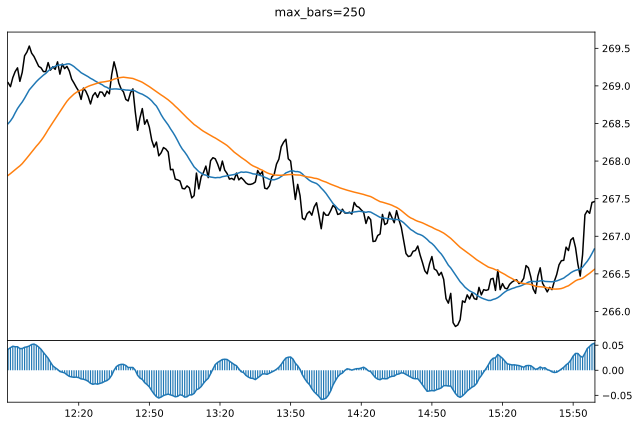

In [55]:
import matplotlib.pyplot as plt

def plot_prices(prices, max_bars=250, title=None):
    prices = prices.tail(max_bars)

    height_ratios = [1.0] + [0.2] 

    fig, axes = plt.subplots(
        nrows=len(height_ratios), sharex=True, tight_layout=True, figsize=(9, 6),
        gridspec_kw=dict(height_ratios=height_ratios, hspace=0)
    )

    if title is None:
        title = f"{max_bars=}"
        fig.suptitle(title)


    # Move y axes to the right
    for ax in axes:
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()

    dtindex = prices.index.tz_localize(None)
    locator = DTArrayLocator(dtindex)
    formatter = DTArrayFormatter(dtindex)

    #axes[0].set_xticks([], minor=False)
    axes[0].xaxis.set_major_locator(locator)
    axes[0].xaxis.set_major_formatter(formatter)

    # Remove x axis margin
    axes[0].margins(x=0) 

    # fig.autofmt_xdate(which='major', rotation=45, ha='right')

    # Remove minor ticks from the x-axis
    #axes[0].xaxis.minorticks_off()
    #axes[0].set_xticks([], minor=True)

    prices = prices.reset_index()
    xdata = np.asarray(prices.index, float)

    axes[0].plot("close", data=prices, color="black", label="Close")
    axes[0].plot("sma20", data=prices, label="SMA 20")
    axes[0].plot("sma50", data=prices, label="SMA 50")

    axes[1].plot("slope", data=prices, label="Slope")
    axes[1].bar(x=xdata, height="slope", data=prices, width=0.5, label="Slope")

plot_prices(prices, 250)
